[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Aplicaciones-Financieras/blob/main/Semana10/2_LSTM_autoencoder_deteccion_anomalias.ipynb)

# Pequeño ejercicio de la clase pasada: Procesar con numpy vs procesar con pandas

In [ ]:
import sys
import numpy as np
import pandas as pd

In [ ]:
aaaa = np.array([[1,2,3,4,5,6,7,8], [8,7,6,5,4,3,2,1], [1,2,3,5,6,4,7,8]])
aaaa

array([[1, 2, 3, 4, 5, 6, 7, 8],
       [8, 7, 6, 5, 4, 3, 2, 1],
       [1, 2, 3, 5, 6, 4, 7, 8]])

In [ ]:
df_aaa = pd.DataFrame(aaaa)
df_aaa

,0,1,2,3,4,5,6,7
0,1,2,3,4,5,6,7,8
1,8,7,6,5,4,3,2,1
2,1,2,3,5,6,4,7,8


In [ ]:
sys.getsizeof(aaaa)

312

In [ ]:
sys.getsizeof(df_aaa)

336

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

In [ ]:
data_raw = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "GOOG",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "10y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        # group_by = 'ticker',
    ).loc[:, 'Adj Close']
data_raw

[*********************100%***********************]  1 of 1 completed


Date
2013-02-19    20.095926
2013-02-20    19.737518
2013-02-21    19.813982
2013-02-22    19.918093
2013-02-25    19.695427
                ...    
2023-02-09    95.459999
2023-02-10    94.860001
2023-02-13    95.000000
2023-02-14    94.949997
2023-02-15    97.099998
Name: Adj Close, Length: 2517, dtype: float64

In [ ]:
data_raw = pd.DataFrame(data_raw)
data_raw

,Adj Close
Date,
2013-02-19,20.095926
2013-02-20,19.737518
2013-02-21,19.813982
2013-02-22,19.918093
2013-02-25,19.695427
...,...
2023-02-09,95.459999
2023-02-10,94.860001
2023-02-13,95.000000


In [ ]:
data_train = data_raw.copy()

In [ ]:
dataa = data_raw.copy()

In [ ]:
%%time
for i in range(1, 11):
  dataa['shift_'+str(i)] = dataa['Adj Close'].shift(-i)

dataa = dataa.dropna()

y = dataa.shift_10

dataa.drop(columns=['shift_10'], inplace=True)

X = np.array(dataa).reshape(-1,10, 1)

CPU times: user 9.98 ms, sys: 0 ns, total: 9.98 ms
Wall time: 14.6 ms


In [ ]:
def data_prep(data):
  x = []
  y = []

  for i in range(10,len(data)):
    x.append(data[i-10:i]) # Registra todos lo data_train en bloques de 10 dias
    y.append(data[i]) # Registra todos los data_train seguidos a partir del dia 10

  x = np.array(x)
  y = np.array(y)

  x = x.reshape(x.shape[0],x.shape[1],1)
  y = y.reshape(y.shape[0],1)
  return x,y

In [ ]:
%%time
data_train = data_train.to_numpy()

x_train, y_train = data_prep(data_train)

CPU times: user 6.95 ms, sys: 0 ns, total: 6.95 ms
Wall time: 9.42 ms


In [ ]:
X

array([[[20.09592628],
        [19.73751831],
        [19.81398201],
        ...,
        [19.9552021 ],
        [20.07948685],
        [20.4608078 ]],

       [[19.73751831],
        [19.81398201],
        [19.91809273],
        ...,
        [20.07948685],
        [20.4608078 ],
        [20.88671112]],

       [[19.81398201],
        [19.91809273],
        [19.69542694],
        ...,
        [20.4608078 ],
        [20.88671112],
        [20.70688629]],

       ...,

       [[90.5       ],
        [87.06999969],
        [83.48999786],
        ...,
        [94.16999817],
        [96.73000336],
        [96.02999878]],

       [[87.06999969],
        [83.48999786],
        [86.69999695],
        ...,
        [96.73000336],
        [96.02999878],
        [98.72000122]],

       [[83.48999786],
        [86.69999695],
        [88.65000153],
        ...,
        [96.02999878],
        [98.72000122],
        [98.98999786]]])

In [ ]:
x_train

array([[[ 20.09592628],
        [ 19.73751831],
        [ 19.81398201],
        ...,
        [ 19.9552021 ],
        [ 20.07948685],
        [ 20.4608078 ]],

       [[ 19.73751831],
        [ 19.81398201],
        [ 19.91809273],
        ...,
        [ 20.07948685],
        [ 20.4608078 ],
        [ 20.88671112]],

       [[ 19.81398201],
        [ 19.91809273],
        [ 19.69542694],
        ...,
        [ 20.4608078 ],
        [ 20.88671112],
        [ 20.70688629]],

       ...,

       [[ 97.94999695],
        [ 99.87000275],
        [101.43000031],
        ...,
        [100.        ],
        [ 95.45999908],
        [ 94.86000061]],

       [[ 99.87000275],
        [101.43000031],
        [108.80000305],
        ...,
        [ 95.45999908],
        [ 94.86000061],
        [ 95.        ]],

       [[101.43000031],
        [108.80000305],
        [105.22000122],
        ...,
        [ 94.86000061],
        [ 95.        ],
        [ 94.94999695]]])

# Dependencias

In [ ]:
import pandas as pd
import numpy as np

import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras import metrics
import keras
import tensorflow as tf
import os

import matplotlib.pyplot as plt

# Datos

## Descarga

In [ ]:
es = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "GOOG AAPL XOM",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "10y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        # group_by = 'ticker',
    ).loc[:, 'Adj Close']
es

[*********************100%***********************]  3 of 3 completed


,AAPL,GOOG,XOM
Date,,,
2013-02-19,14.188738,20.095926,58.406971
2013-02-20,13.845119,19.737518,58.178097
2013-02-21,13.759057,19.813982,57.929604
2013-02-22,13.905578,19.918093,58.328495
2013-02-25,13.658502,19.695427,57.347630
...,...,...,...
2023-02-09,150.639999,95.459999,113.476807
2023-02-10,151.009995,94.860001,118.260002
2023-02-13,153.850006,95.000000,117.800003


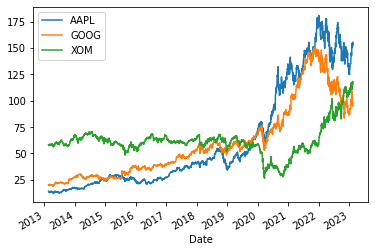

In [ ]:
es.plot()

## Preprocesamiento

In [ ]:
def generate_datasets_for_training(data, window_size,scale=True, scaler_type=StandardScaler):
  _l = len(data) 
  data2 = scaler_type().fit_transform(data)
  Ds = []
  Xs = []
  Ys = []
  for i in range(0, (_l - window_size)):
    Ds.append(data.iloc[i:i+window_size, :].index)
    Xs.append(data2[i:i+window_size])
    Ys.append(data2[i:i+window_size])
  tr_x, ts_x, tr_y, ts_y, DsTr, DsTe = [np.array(x) for x in train_test_split(Xs, Ys, Ds)]
  assert tr_x.shape[2] == ts_x.shape[2] == (data2.shape[1] if (type(data2) == np.ndarray) else len(data2))
  return  (tr_x.shape[2], tr_x, tr_y, ts_x, ts_y, DsTr, DsTe)

In [ ]:
feats, X, Y, XX, YY, DatesTr, DatesTe = generate_datasets_for_training(es, 4)

In [ ]:
X.shape, Y.shape, XX.shape, YY.shape

((1884, 4, 3), (1884, 4, 3), (629, 4, 3), (629, 4, 3))

### Vistazo a los datos

In [ ]:
DatesTr[0]

array(['2016-08-30T00:00:00.000000000', '2016-08-31T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2016-09-02T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
X[0]

array([[-0.75412376, -0.62199596,  0.14173482],
       [-0.75365623, -0.62490171,  0.12230558],
       [-0.75071049, -0.62243751,  0.10696357],
       [-0.74603477, -0.61861998,  0.13662216]])

In [ ]:
Y[0]

array([[-0.75412376, -0.62199596,  0.14173482],
       [-0.75365623, -0.62490171,  0.12230558],
       [-0.75071049, -0.62243751,  0.10696357],
       [-0.74603477, -0.61861998,  0.13662216]])

In [ ]:
DatesTe[0]

array(['2018-01-19T00:00:00.000000000', '2018-01-22T00:00:00.000000000',
       '2018-01-23T00:00:00.000000000', '2018-01-24T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
XX[0]

array([[-0.39754914, -0.09721079,  0.33342404],
       [-0.40452103, -0.07114387,  0.39233264],
       [-0.40433001, -0.05097406,  0.39500891],
       [-0.41779644, -0.05913597,  0.40732471]])

In [ ]:
YY[0]

array([[-0.39754914, -0.09721079,  0.33342404],
       [-0.40452103, -0.07114387,  0.39233264],
       [-0.40433001, -0.05097406,  0.39500891],
       [-0.41779644, -0.05913597,  0.40732471]])

# Entrenamiento del autoencoder

In [ ]:
epochs = 100
batch_size = 32
window_length = 4


early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=1e-2, patience=5, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True)

feats, X, Y, XX, YY, DatesTr, DatesTe = generate_datasets_for_training(es, 4)

model = keras.Sequential()
model.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', batch_input_shape=(None, window_length, feats), return_sequences=True, name='encoder_1'))
model.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='encoder_2'))
model.add(keras.layers.LSTM(16, kernel_initializer='he_uniform', return_sequences=False, name='encoder_3'))
model.add(keras.layers.RepeatVector(window_length, name='encoder_decoder_bridge'))
model.add(keras.layers.LSTM(16, kernel_initializer='he_uniform', return_sequences=True, name='decoder_1'))
model.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='decoder_2'))
model.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', return_sequences=True, name='decoder_3'))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(feats)))
model.compile(loss="mse",optimizer='adam')
model.build()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (LSTM)            (None, 4, 64)             17408     
                                                                 
 encoder_2 (LSTM)            (None, 4, 32)             12416     
                                                                 
 encoder_3 (LSTM)            (None, 16)                3136      
                                                                 
 encoder_decoder_bridge (Rep  (None, 4, 16)            0         
 eatVector)                                                      
                                                                 
 decoder_1 (LSTM)            (None, 4, 16)             2112      
                                                                 
 decoder_2 (LSTM)            (None, 4, 32)             6272      
                                                        

In [ ]:
model.fit(x=X, y=Y, validation_data=(XX, YY), epochs=100, batch_size=batch_size, shuffle=True, callbacks=[early_stop])

Epoch 1/100
59/59 [==============================] - 18s 71ms/step - loss: 0.5940 - val_loss: 0.2910
Epoch 2/100
59/59 [==============================] - 1s 23ms/step - loss: 0.2118 - val_loss: 0.1173
Epoch 3/100
59/59 [==============================] - 3s 53ms/step - loss: 0.0839 - val_loss: 0.0482
Epoch 4/100
59/59 [==============================] - 2s 30ms/step - loss: 0.0373 - val_loss: 0.0239
Epoch 5/100
59/59 [==============================] - 2s 27ms/step - loss: 0.0204 - val_loss: 0.0166
Epoch 6/100
59/59 [==============================] - 1s 24ms/step - loss: 0.0144 - val_loss: 0.0122
Epoch 7/100
59/59 [==============================] - 2s 26ms/step - loss: 0.0111 - val_loss: 0.0109
Epoch 8/100
59/59 [==============================] - 2s 25ms/step - loss: 0.0102 - val_loss: 0.0095
Epoch 9/100
59/59 [==============================] - 1s 25ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 10/100
59/59 [==============================] - 1s 23ms/step - loss: 0.0077 - val_loss: 0.007

# Predicciones



Problemita incómodo: dimensiones

In [ ]:
X.shape

(1884, 4, 3)

In [ ]:
model.predict(X[0])

ValueError: ignored

In [ ]:
model.predict(X[0].reshape(1,4,3))

1/1 [==============================] - 2s 2s/step


array([[[ 0.17884867,  0.19441518, -0.2632545 ],
        [ 0.2609215 ,  0.34572875, -0.6045428 ],
        [ 0.30329457,  0.44756505, -0.8071001 ],
        [ 0.33939585,  0.49960065, -0.84602296]]], dtype=float32)

¿Qué será el vector latente?

In [ ]:
yy_pred = model.predict(XX)

20/20 [==============================] - 0s 7ms/step


In [ ]:
yy_pred

array([[[ 1.6467576 ,  1.9652843 , -0.42739943],
        [ 1.642978  ,  2.11522   , -0.44502977],
        [ 1.6150535 ,  2.120045  , -0.41985565],
        [ 1.6054182 ,  2.1540885 , -0.4276473 ]],

       [[-0.81769174, -0.84936213, -0.18598127],
        [-0.7844393 , -0.8770543 , -0.28234878],
        [-0.7669433 , -0.8472292 , -0.2674515 ],
        [-0.79371274, -0.8676545 , -0.21947038]],

       [[-0.83588284, -0.8430892 ,  0.19418824],
        [-0.81099254, -0.8642276 ,  0.29026663],
        [-0.7910787 , -0.83419704,  0.2529068 ],
        [-0.81113243, -0.86169964,  0.19616732]],

       ...,

       [[ 1.8122942 ,  2.1438382 , -0.21541792],
        [ 1.8281615 ,  2.339894  , -0.28684044],
        [ 1.8623427 ,  2.419753  , -0.2947302 ],
        [ 1.884814  ,  2.480716  , -0.30761743]],

       [[ 0.30514872,  0.14437902, -1.4824777 ],
        [ 0.23871689, -0.03175242, -1.9970927 ],
        [ 0.13705768,  0.00699443, -1.9144192 ],
        [ 0.06823657,  0.10723817, -1.7319407 ]]

In [ ]:
yy_pred.shape

(629, 4, 3)

In [ ]:
vacia = np.array([])

In [ ]:
for i in range(len(XX)):
  vacia = np.append(vacia, mean_absolute_error(XX[i,:,:], yy_pred[i,:,:]))

In [ ]:
vacia.shape

(629,)

In [ ]:
vacia

array([0.21325193, 0.07382192, 0.04075055, 0.06782565, 0.03483709,
       0.11204599, 0.02980987, 0.02938599, 0.04067902, 0.09037443,
       0.08539086, 0.03951773, 0.04688586, 0.08823363, 0.04633526,
       0.14015171, 0.10997775, 0.03308921, 0.04535009, 0.1750991 ,
       0.03363477, 0.04282655, 0.16149722, 0.02228778, 0.22157384,
       0.12759913, 0.08527927, 0.06339926, 0.05802941, 0.11894015,
       0.06838645, 0.09036458, 0.26397436, 0.05878498, 0.04496668,
       0.0615784 , 0.05048256, 0.02842075, 0.04878497, 0.01930008,
       0.04425259, 0.08329671, 0.04074449, 0.05575454, 0.06136532,
       0.04814472, 0.11074409, 0.0581563 , 0.05468766, 0.05661324,
       0.05362122, 0.03507233, 0.05250223, 0.11473022, 0.0605121 ,
       0.1268451 , 0.17282996, 0.05970241, 0.25786316, 0.06319884,
       0.03048152, 0.05189898, 0.12468386, 0.03252978, 0.13307074,
       0.13338493, 0.05274081, 0.05758452, 0.0624647 , 0.03182741,
       0.04591031, 0.10628579, 0.0677475 , 0.06430219, 0.03927

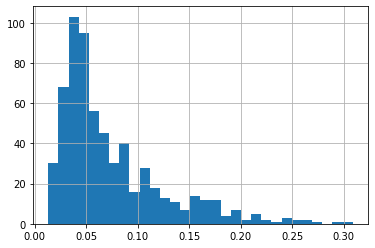

In [ ]:
pd.Series(vacia).hist(bins=30)

In [ ]:
aux = pd.Series(vacia)

In [ ]:
aux.describe()

count    629.000000
mean       0.074708
std        0.051848
min        0.013319
25%        0.037858
50%        0.055137
75%        0.095520
max        0.308801
dtype: float64

## ¿Que utilidad tienen los cuantiles?
¿Podemos utilizarlos o no deberiamos?

In [ ]:
aux.quantile(.99)

0.24936294689902158

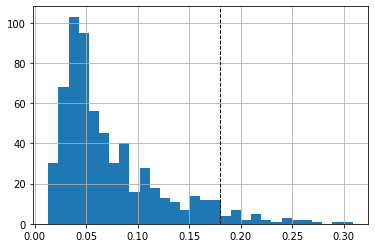

In [ ]:
pd.Series(vacia).hist(bins=30)
plt.axvline(aux.quantile(.95), color='k', linestyle='dashed', linewidth=1)

# Anomalías

Recordemos como se ven nuestros datos

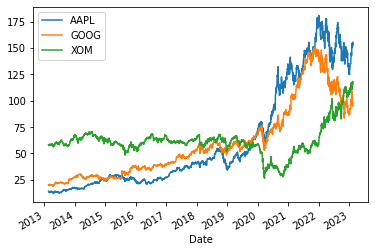

In [ ]:
es.plot()

In [ ]:
treshold = aux.quantile(.95)
treshold

0.17985956985770712

In [ ]:
aux[aux > treshold][:5]

0     0.213252
24    0.221574
32    0.263974
58    0.257863
92    0.249865
dtype: float64

## Vistazo a las anomalías
Vamos a revisar los índices donde se encuentran las anomalías

In [ ]:
fechas_aux = DatesTe[[0, 24, 32, 58, 92, 338]]
fechas_aux

array([['2021-06-24T00:00:00.000000000', '2021-06-25T00:00:00.000000000',
        '2021-06-28T00:00:00.000000000', '2021-06-29T00:00:00.000000000'],
       ['2022-06-13T00:00:00.000000000', '2022-06-14T00:00:00.000000000',
        '2022-06-15T00:00:00.000000000', '2022-06-16T00:00:00.000000000'],
       ['2023-02-08T00:00:00.000000000', '2023-02-09T00:00:00.000000000',
        '2023-02-10T00:00:00.000000000', '2023-02-13T00:00:00.000000000'],
       ['2023-02-01T00:00:00.000000000', '2023-02-02T00:00:00.000000000',
        '2023-02-03T00:00:00.000000000', '2023-02-06T00:00:00.000000000'],
       ['2020-03-18T00:00:00.000000000', '2020-03-19T00:00:00.000000000',
        '2020-03-20T00:00:00.000000000', '2020-03-23T00:00:00.000000000'],
       ['2022-09-27T00:00:00.000000000', '2022-09-28T00:00:00.000000000',
        '2022-09-29T00:00:00.000000000', '2022-09-30T00:00:00.000000000']],
      dtype='datetime64[ns]')

Una ventana de tiempo alrededor de la anomalía

In [ ]:
es.loc[fechas_aux[4]]

,AAPL,GOOG,XOM
Date,,,
2020-03-18,60.465324,54.840000,27.975086
2020-03-19,60.002029,55.764500,29.081581
2020-03-20,56.192772,53.616001,27.654116
2020-03-23,54.999001,52.831001,26.564503


In [ ]:
inicio = fechas_aux[4][0] - pd.Timedelta('40 days')

In [ ]:
fin = fechas_aux[4][3] + pd.Timedelta('40 days')

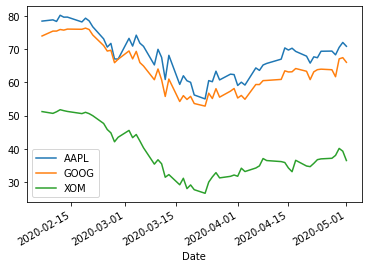

In [ ]:
es.loc[inicio: fin].plot()

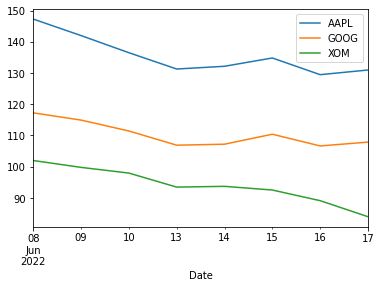

In [ ]:
es.loc[pd.to_datetime('2022-06-08'): pd.to_datetime('2022-06-18')].plot()

Otra ventana de tiempo alrededor de una anomalía

In [ ]:
es.loc[fechas_aux[4]]

,AAPL,GOOG,XOM
Date,,,
2020-03-18,60.465324,54.840000,27.975086
2020-03-19,60.002029,55.764500,29.081581
2020-03-20,56.192772,53.616001,27.654116
2020-03-23,54.999001,52.831001,26.564503


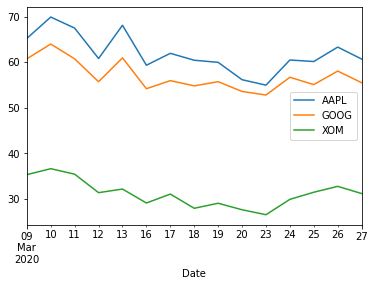

In [ ]:
es.loc[pd.to_datetime('2020-03-08'): pd.to_datetime('2020-03-28')].plot()